<div style="background-color:white">
    <img src="./imgs/hindi_hw_digits.png" />
</div>

In [1]:
import warnings

warnings.simplefilter("ignore")

import torch
import torch.nn as nn

import torchvision
from torchvision import transforms

from sklearn.metrics import accuracy_score

from ml_utils import *
from hindi.datasets import Digits

In [2]:
img_transformer = transforms.Compose([
                        transforms.Grayscale(),
                        transforms.ToTensor(),
                        transforms.Normalize((0.5,), (0.5,))
                    ])

train_dataset = Digits( "./data", train=True, transform=img_transformer, download=True )

test_dataset = Digits( "./data", train=False, transform=img_transformer, download=True )

torch.Size([1, 32, 32])


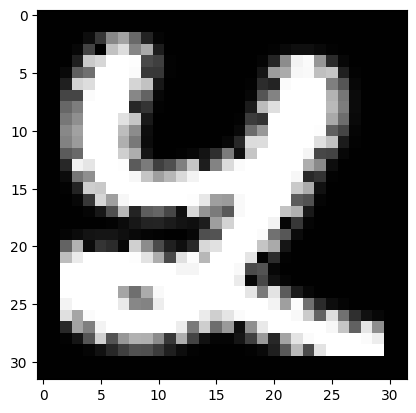

5


In [3]:
x_example, y_example = train_dataset[8886]

print( x_example.shape )

x_img = transforms.ToPILImage()(x_example)

plt.imshow( x_img, cmap='gray' )
plt.show()

print( y_example )

In [4]:
device = torch.device( 'cuda' if torch.cuda.is_available() else 'cpu' )

batch_size = 32

input_channels = 1

classes = 10

filters = 16

kernel_size = 3

padding = kernel_size//2

pool_size = 2

original_pixels_per_channel = 32*32

In [5]:
loss_func = nn.CrossEntropyLoss()

train_loader = DataLoader( train_dataset, batch_size=batch_size, shuffle=True )

test_loader = DataLoader( test_dataset, batch_size=batch_size )

<div style="background-color:white">
    <img src="arch_imgs/One_Conv_No_BN.png" width="35%" height="35%"/>
</div>

In [ ]:
one_conv_model = nn.Sequential(
                                nn.Conv2d( input_channels, filters, kernel_size, padding=padding ), # 1x32x32 => 16x32x32
                                nn.ReLU(inplace=True), #16x32x32 => 16x32x32
    
                                nn.MaxPool2d(pool_size), # 16x32x32 => 16x16x16
    
                                nn.Flatten(), # 16x16x16 => 4096
                                nn.Linear( 4096, classes) # 4096 => 10
                            )

In [ ]:
one_conv_model_results_df = train_model( one_conv_model, loss_func, train_loader, test_loader=test_loader, score_funcs={'accuracy': accuracy_score}, device=device, epochs=30 )

<div style="background-color:white">
    <img src="arch_imgs/One_Conv_Wth_BN.png" width="35%" height="35%"/>
</div>

In [ ]:
one_conv_wth_bn_model = nn.Sequential(
                                        nn.Conv2d( input_channels, filters, kernel_size, padding=padding ), # 1x32x32 => 16x32x32
                                        nn.BatchNorm2d( filters ), #16x32x32 => 16x32x32
                                        nn.ReLU(inplace=True), #16x32x32 => 16x32x32
            
                                        nn.MaxPool2d(pool_size), # 16x32x32 => 16x16x16
            
                                        nn.Flatten(), # 16x16x16 => 4096
                                        nn.Linear( 4096, classes) # 4096 => 10
                                    )

In [ ]:
one_conv_wth_bn_model_results_df = train_model( one_conv_wth_bn_model, loss_func, train_loader, test_loader=test_loader, score_funcs={'accuracy': accuracy_score}, device=device, epochs=30 )

In [ ]:
print( "One Conv No BN Model Test Accuracy: {}".format( one_conv_model_results_df[ 'test accuracy' ].iloc[-1] ) )
print( "One Conv With BN Model Test Accuracy: {}".format( one_conv_wth_bn_model_results_df[ 'test accuracy' ].iloc[-1] ) )

In [ ]:
sns.lineplot( x='epoch', y='test accuracy', data=one_conv_model_results_df, label="One Conv Without BN Model" )
sns.lineplot( x='epoch', y='test accuracy', data=one_conv_wth_bn_model_results_df, label="One Conv With BN Model" )

In [ ]:
sns.lineplot( x='epoch', y='train loss', data=one_conv_model_results_df, label="One Conv Without BN Model" )
sns.lineplot( x='epoch', y='train loss', data=one_conv_wth_bn_model_results_df, label="One Conv With BN Model" )

In [ ]:
one_conv_wth_bn_model_results_df.head()

<div style="background-color:white">
    <img src="arch_imgs/Three_Convs_No_BN.png" width="35%" height="35%"/>
</div>

In [6]:
three_convs_model = nn.Sequential(
                                    nn.Conv2d( input_channels, filters, kernel_size, padding=padding ), # 1x32x32 => 16x32x32
                                    nn.ReLU(inplace=True), #16x32x32 => 16x32x32
                                    nn.Conv2d(filters, filters, kernel_size, padding=padding ), # 16x32x32 => 16x32x32
                                    nn.ReLU(inplace=True), #16x32x32 => 16x32x32
                                    nn.Conv2d(filters, filters, kernel_size, padding=padding ), # 16x32x32 => 16x32x32
                                    nn.ReLU(inplace=True), #16x32x32 => 16x32x32
                                    nn.MaxPool2d(pool_size), # 16x32x32 => 16x16x16
        
                                    nn.Flatten(), # 16x16x16 => 4096
                                    nn.Linear( 4096, classes) # 1024 => 10
                                )

In [7]:
three_convs_model_results_df = train_model( 
                                            three_convs_model,
                                            loss_func, 
                                            train_loader, 
                                            test_loader=test_loader, 
                                            score_funcs={'accuracy': accuracy_score}, 
                                            device=device, 
                                            epochs=30,
                                            capture_conv_sample_weights=True, 
                                            conv_index=4, 
                                            wx_bt_index=3, 
                                            wx_ch_index=0, 
                                            wx_ro_index=0, 
                                            wx_index=0,
                                            wy_bt_index=3,
                                            wy_ch_index=0, 
                                            wy_ro_index=2, 
                                            wy_index=2
                                         )

Epoch: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [09:30<00:00, 19.00s/it]


In [8]:
three_convs_model_results_df.head()

,epoch,total time,train loss,wx,wy,test loss,train accuracy,test accuracy
0,0,19.291747,2.276320,0.056281,0.001271,2.219508,0.320529,0.663667
1,1,35.769818,1.545239,0.058662,0.002467,0.525411,0.769529,0.848667
2,2,52.897303,0.359734,0.059027,0.002518,0.295553,0.893059,0.911667
3,3,69.975449,0.263608,0.059158,0.002369,0.307978,0.916235,0.896000
4,4,86.990875,0.233794,0.059283,0.002244,0.479051,0.922765,0.849333


<div style="background-color:white">
    <img src="arch_imgs/Three_Convs_Wth_BN.png" width="35%" height="35%"/>
</div>

In [9]:
three_convs_wth_bn_model = nn.Sequential(
                                            nn.Conv2d( input_channels, filters, kernel_size, padding=padding ), # 1x32x32 => 16x32x32
                                            nn.BatchNorm2d( filters ), #16x32x32 => 16x32x32
                                            nn.ReLU(inplace=True), #16x32x32 => 16x32x32
                                            nn.Conv2d(filters, filters, kernel_size, padding=padding ), # 16x32x32 => 16x32x32
                                            nn.BatchNorm2d( filters ), #16x32x32 => 16x32x32
                                            nn.ReLU(inplace=True), #16x32x32 => 16x32x32
                                            nn.Conv2d(filters, filters, kernel_size, padding=padding ), # 16x32x32 => 16x32x32
                                            nn.BatchNorm2d( filters ), #16x32x32 => 16x32x32
                                            nn.ReLU(inplace=True), #16x32x32 => 16x32x32
                                            nn.MaxPool2d(pool_size), # 16x32x32 => 16x16x16
                
                                            nn.Flatten(), # 16x16x16 => 4096
                                            nn.Linear( 4096, classes) # 4096 => 10
                                    )

In [10]:
three_convs_wth_bn_model_results_df = train_model( 
                                                    three_convs_wth_bn_model,
                                                    loss_func, 
                                                    train_loader, 
                                                    test_loader=test_loader, 
                                                    score_funcs={'accuracy': accuracy_score}, 
                                                    device=device, 
                                                    epochs=30,
                                                    capture_conv_sample_weights=True, 
                                                    conv_index=6, 
                                                    wx_bt_index=3, 
                                                    wx_ch_index=0, 
                                                    wx_ro_index=0, 
                                                    wx_index=0,
                                                    wy_bt_index=3,
                                                    wy_ch_index=0, 
                                                    wy_ro_index=2, 
                                                    wy_index=2
                                                 )

Epoch: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [09:55<00:00, 19.85s/it]


In [11]:
three_convs_wth_bn_model_results_df.head()

,epoch,total time,train loss,wx,wy,test loss,train accuracy,test accuracy
0,0,17.868963,0.581885,-0.047148,0.054502,0.259052,0.861647,0.946333
1,1,35.248226,0.208916,-0.045947,0.055564,0.168343,0.954647,0.961667
2,2,52.643451,0.143904,-0.045077,0.055986,0.124953,0.968000,0.972333
3,3,69.928889,0.112089,-0.044697,0.055683,0.104425,0.975824,0.977333
4,4,87.353182,0.092645,-0.044037,0.055786,0.092310,0.980294,0.981333


In [ ]:
print( "Three Convs No BN Model Test Accuracy: {}".format( three_convs_model_results_df[ 'test accuracy' ].iloc[-1] ) )
print( "Three Convs With BN Model Test Accuracy: {}".format( three_convs_wth_bn_model_results_df[ 'test accuracy' ].iloc[-1] ) )

In [ ]:
sns.lineplot( x='epoch', y='test accuracy', data=three_convs_model_results_df, label="Three Convs Without BN Model" )
sns.lineplot( x='epoch', y='test accuracy', data=three_convs_wth_bn_model_results_df, label="Three Convs Wth BN Model" )

In [ ]:
sns.lineplot( x='epoch', y='train loss', data=three_convs_model_results_df, label="Three Convs Without BN Model" )
sns.lineplot( x='epoch', y='train loss', data=three_convs_wth_bn_model_results_df, label="Three Convs Wth BN Model" )

<AxesSubplot: xlabel='wx', ylabel='wy'>

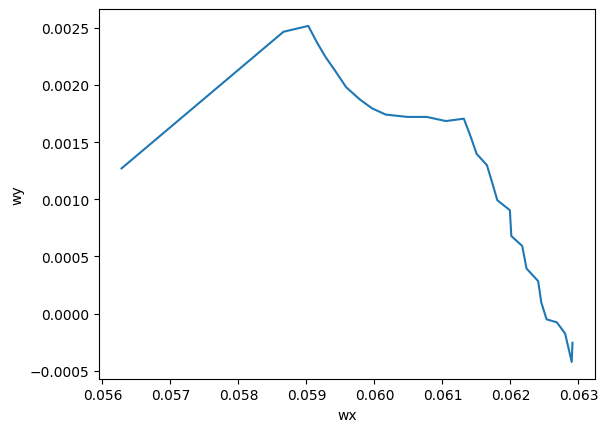

In [132]:
results_df = three_convs_model_results_df

min_wx = results_df[ 'wx' ].min() - 0.5
max_wx = results_df[ 'wx' ].max() + 0.5

min_wy = results_df[ 'wy' ].min() - 0.5
max_wy = results_df[ 'wy' ].max() + 0.5

min_ls = results_df[ 'train loss' ].min() - 0.5
max_ls = results_df[ 'train loss' ].max() + 0.5 

wx = torch.tensor( results_df[ 'wx' ].values )
wy = torch.tensor( results_df[ 'wy' ].values )
ls = torch.tensor( results_df[ 'train loss' ].values )

sns.lineplot( x='wx', y='wy', data=results_df )

In [133]:
#x = torch.linspace( min_wx, max_wx, 6 )
#y = torch.linspace( min_wy, max_wy, 5 )

xx, yy = torch.meshgrid( wx, wy, indexing="xy" )

lt = loss_tensor.repeat( 30, 1 )

In [134]:
lt.shape

torch.Size([30, 30])

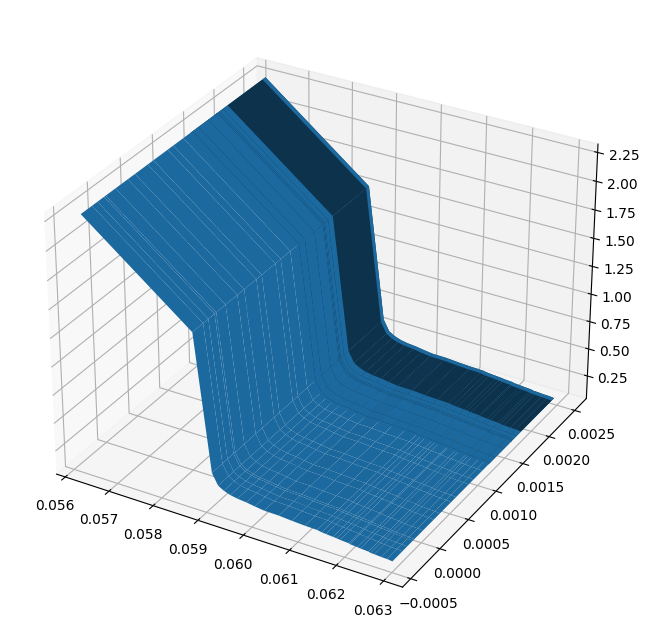

In [135]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection="3d")
#ax.set_xlim([ min_wx, max_wx ])
#ax.set_ylim([ min_wy, max_wy ])
#ax.set_zlim([ min_ls, max_ls ])
ax.plot_surface( xx.detach().cpu().numpy(), yy.detach().cpu().numpy(), lt.detach().cpu().numpy() )

<AxesSubplot: xlabel='wx', ylabel='wy'>

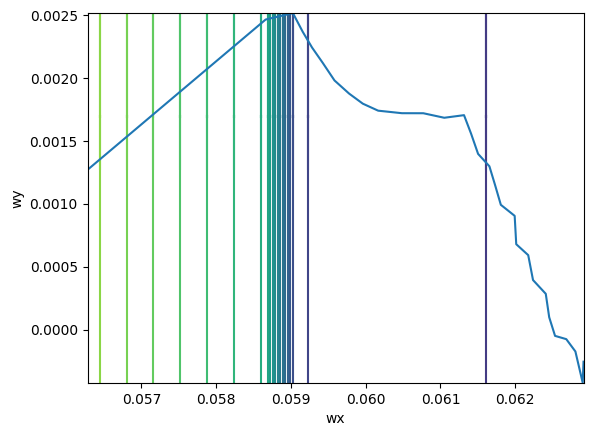

In [136]:
cs = plt.contour(xx, yy, lt, levels=torch.linspace(min_ls,max_ls, steps=30 ) )
ax = plt.gca()
sns.lineplot( x='wx', y='wy', data=results_df, ax=ax )

In [210]:
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

    def do_3d_projection( self, renderer=None ):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        return np.min(zs)

def draw_contour( results_df, figsize=(10,10), title=None ):
    wx = torch.tensor( results_df[ 'wx' ].values )
    wy = torch.tensor( results_df[ 'wy' ].values )
    ls = torch.tensor( results_df[ 'train loss' ].values )

    fig = plt.figure( figsize=figsize )
    ax = plt.axes(projection="3d")
    ax.scatter3D( wx.detach().cpu().numpy(), wy.detach().cpu().numpy(), ls.detach().cpu().numpy(), s=3 )

    for j in range( 1, wx.shape[0] ):
        i = j - 1
        Xs = [ wx[i].item(), wx[j].item() ]
        Ys = [ wy[i].item(), wy[j].item() ]
        Ls = [ ls[i].item(), ls[j].item() ]
        
        arw = Arrow3D( Xs, Ys, Ls, arrowstyle="->", color="purple", lw = 0.5, mutation_scale=9 )
        ax.add_artist(arw)

    if title is not None:
        ax.set_title(title, fontsize=10)

    ax.set_xlabel( 'Sample Weight 1' )
    ax.set_ylabel( 'Sample Weight 2' )
    ax.set_zlabel( 'Training Loss' )

    ax.xaxis.set_tick_params( labelbottom=False )
    ax.yaxis.set_tick_params( labelleft=False )
    ax.zaxis.set_tick_params( labelbottom=False )

    ax.set_box_aspect( aspect=None, zoom=0.8 )
    fig.tight_layout()
    plt.show()
    return fig

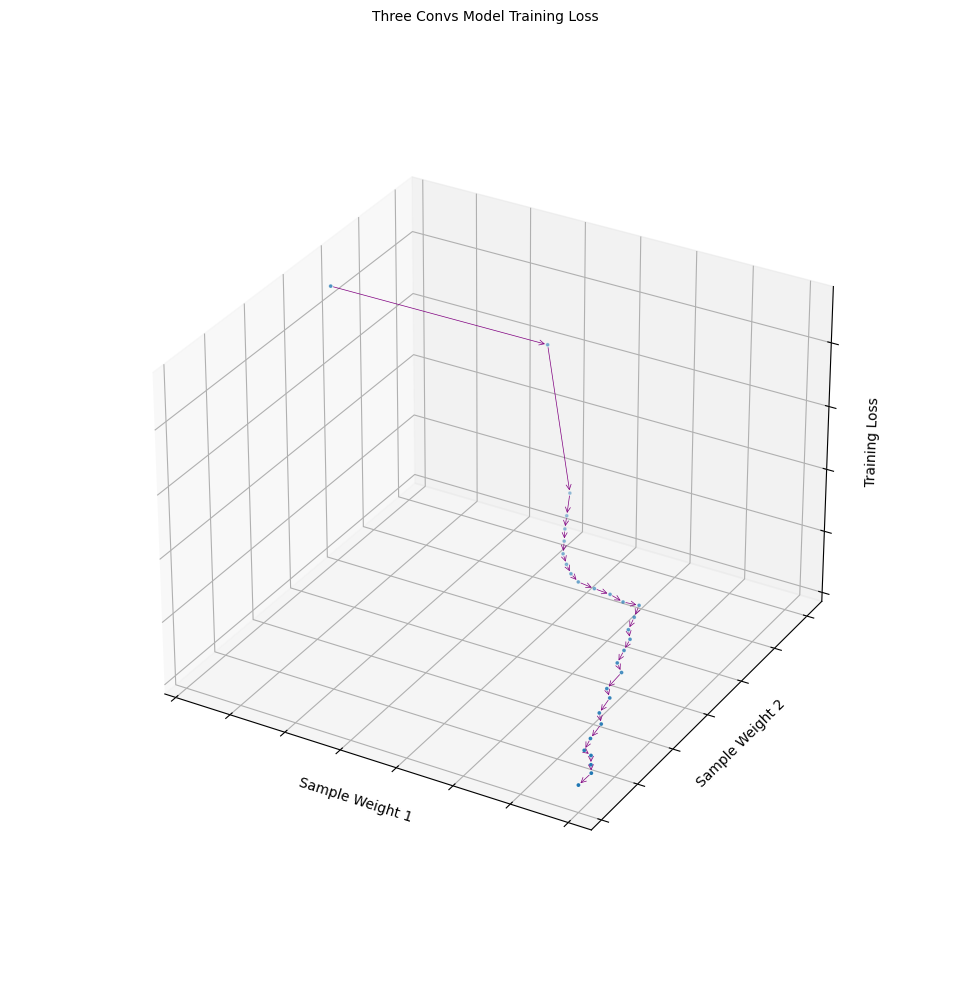

In [211]:
fig = draw_contour( three_convs_model_results_df, title='Three Convs Model Training Loss' )
fig.savefig( 'three_convs_model_contour.png' )

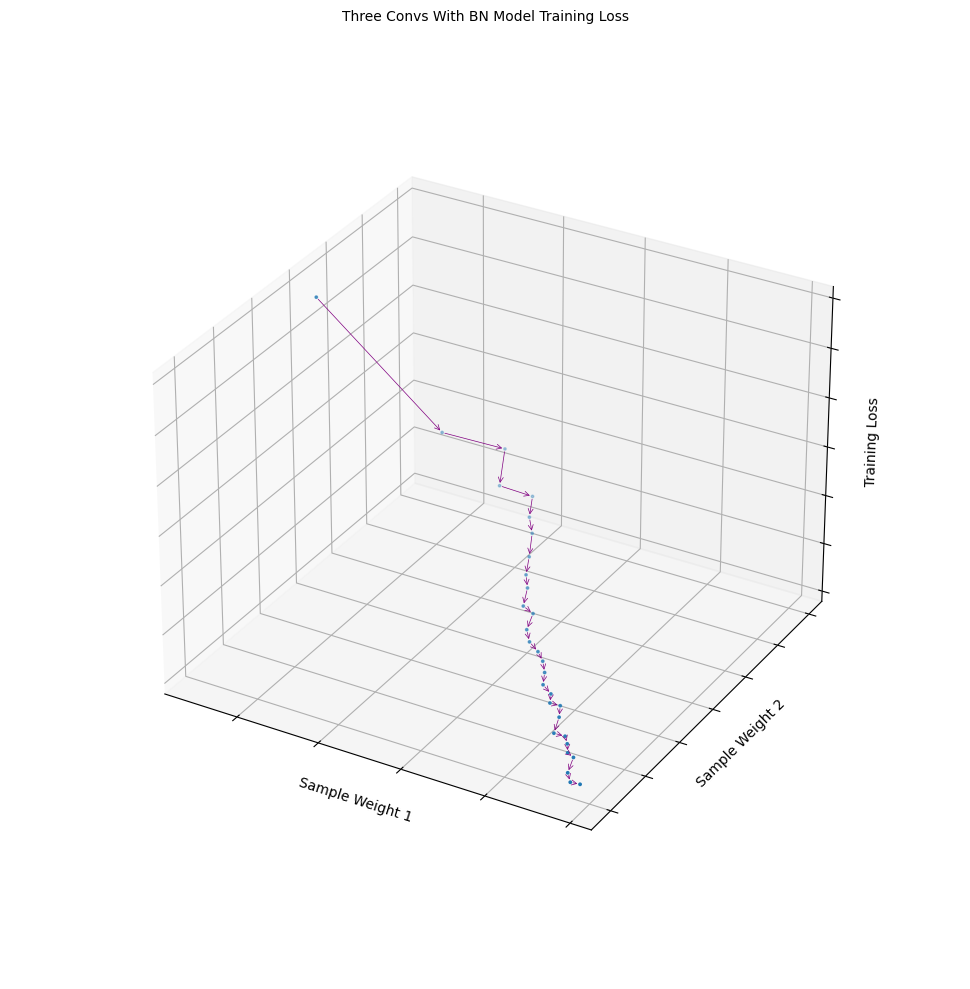

In [209]:
draw_contour( three_convs_wth_bn_model_results_df, title='Three Convs With BN Model Training Loss' )